In [16]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster.vq import kmeans, vq, whiten
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns, pandas as pd

## FIFA 18
FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset contains data on the 1000 top individual players in the game. 

### Explore two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

In [2]:
fifa = pd.read_csv("../00_DataSets/fifa_18_sample_data.csv")
fifa.head(3)

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Scaling the values of eur_wage and eur_value using the whiten() function.
fifa['scaled_wage'] = whiten(fifa["eur_wage"])
fifa['scaled_value'] = whiten(fifa["eur_value"])

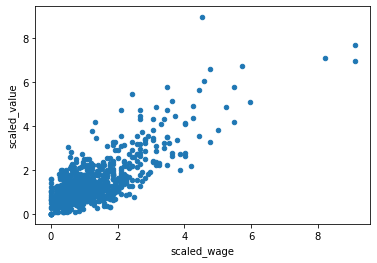

In [6]:
# Plot the scaled wages and transfer values
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()

In [7]:
# Check the mean and standard deviation of the scaled data
fifa[['scaled_wage', 'scaled_value']].describe().T

,count,mean,std,min,25%,50%,75%,max
scaled_wage,1000.0,1.119812,1.0005,0.0,0.467717,0.854794,1.407184,9.112425
scaled_value,1000.0,1.306272,1.0005,0.0,0.730412,1.022576,1.542995,8.984064


### Exploring defenders
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

* sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
* aggression: a number between 0-99 which signifies the commitment and will of a player.

These are typically high in defense-minded players.

In [8]:
# scaling the columns
fifa["scaled_sliding_tackle"] = whiten(fifa["sliding_tackle"])
fifa["scaled_aggression"] = whiten(fifa["aggression"])

In [9]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.837810           4.280968
2                            0.579966           1.766698
3                            1.166930           3.415214


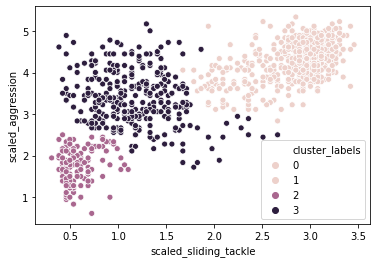

In [10]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

In [14]:
fifa.columns[fifa.columns.str.contains("phy")]

Index(['phy'], dtype='object')

In [15]:
# scaling the defence and phy columns
fifa["scaled_def"] = whiten(fifa["def"])
fifa["scaled_phy"] = whiten(fifa["phy"])

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


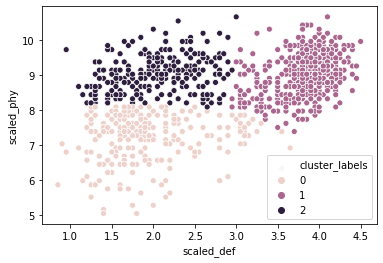

In [17]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x="scaled_def", y="scaled_phy", hue="cluster_labels", data=fifa)
plt.show()

In [ ]:
# seed impacts the clusters above.

Basic checks on clusters
In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking attributes of a player. Pace (pac), Dribbling (dri) and Shooting (sho) are features that are present in attack minded players. In this exercise, k-means clustering has already been applied on the data using the scaled values of these three attributes. Try some basic checks on the clusters so formed.

The data is stored in a Pandas data frame, fifa. The scaled column names are present in a list scaled_features. The cluster labels are stored in the cluster_labels column. Recall the .count() and .mean() methods in Pandas help you find the number of observations and mean of observations in a data frame.

In [ ]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

In [18]:
scaled_features = ['scaled_pac',
                   'scaled_sho',
                   'scaled_pas',
                   'scaled_dri',
                   'scaled_def',
                   'scaled_phy']

In [ ]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])